In [1]:
# Dataset  - Heart Disease

# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pylab
from matplotlib import style

In [ ]:
'''
age - age in years
sex - sex (1 = male; 0 = female)
cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
trestbps - resting blood pressure (in mm Hg on admission to the hospital)
chol - serum cholestoral in mg/dl
fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
restecg - resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy)
thalach - maximum heart rate achieved
exang - exercise induced angina (1 = yes; 0 = no)
oldpeak - ST depression induced by exercise relative to rest
slope - the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)
ca - number of major vessels (0-3) colored by flourosopy
thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
num - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < 50% diameter narrowing; Value 1 = > 50% diameter narrowing)
'''

In [192]:
# Load dataset
path = "E:/Exercise/Extra Projects/Kaggle/heart.csv"
ht = pd.read_csv(path)
ht.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [5]:
ht.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
ht.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [51]:
ht.shape

(303, 14)

In [3]:
# check null vaalue
print(ht.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [32]:
# check value counts

# To identify categorical properties unique 
for f in col:
    print("columns = ", f ,"\n",ht[f].unique(),"\n")


columns =  age 
 [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77] 

columns =  sex 
 [1 0] 

columns =  cp 
 [3 2 1 0] 

columns =  trestbps 
 [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164] 

columns =  chol 
 [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 

In [124]:
# check distribution of y-classes
ht.target.value_counts()

# Here we can see data is balanced

1    165
0    138
Name: target, dtype: int64

In [195]:
cols = list(ht.columns)
cols.remove('target')
cols

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

Text(0.5, 1.0, 'correlation Matrix')

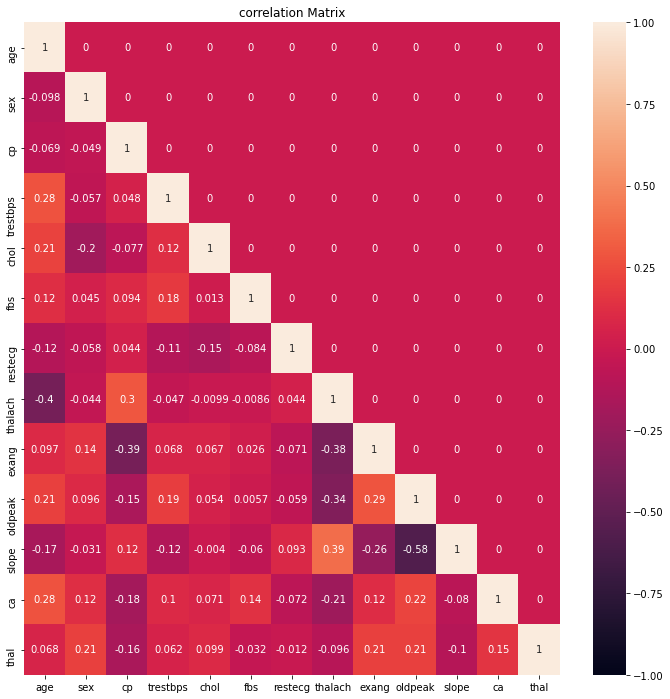

In [196]:
cor = ht[cols].corr()
cor = np.tril(cor)
plt.subplots(figsize=(12,12))
# sns.set(font_scale=0.50) - to adjust size of font in table
sns.heatmap(cor,xticklabels=cols,yticklabels=cols,
            vmin=-1,vmax=1,annot=True,square=False)
plt.title("correlation Matrix")

Here we can see less correlation between features

# Detect and Reomvove outlier using IQR method

C:\Users\Shirish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trestbps'>

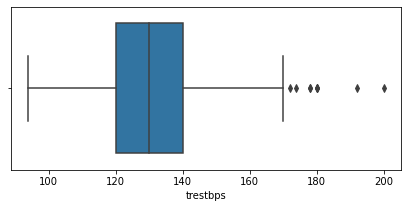

In [197]:
# check outlier in trestbps using box plot method

fig = plt.figure(figsize=(7,3))
sns.boxplot(ht.trestbps)

Here we get outliers in trestbps

In [198]:
Q1 = ht.trestbps.quantile(0.25)
Q3 = ht.trestbps.quantile(0.75)
Q1, Q3

(120.0, 140.0)

In [199]:
IQR = Q3 - Q1
IQR

20.0

In [200]:
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
lower, upper

(90.0, 170.0)

In [201]:
# check outliers out of the limit
ht[(ht.trestbps<lower) | (ht.trestbps>upper)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0


In [202]:
# Remove outlier using AND operator
ht[(ht.trestbps>lower) & (ht.trestbps<upper)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [203]:
mean = np.mean(ht['trestbps'])
mean

131.62376237623764

In [204]:
# Replace all ourliers using mean of variable
ht["trestbps"] = np.where(ht["trestbps"] > upper , mean,ht['trestbps'])
ht["trestbps"] = np.where(ht["trestbps"] < lower , mean,ht['trestbps'])

C:\Users\Shirish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chol'>

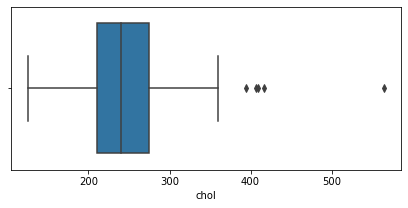

In [205]:
# check outlier in chol using box plot method

fig = plt.figure(figsize=(7,3))
sns.boxplot(ht.chol)

In [206]:
Q1 = ht.chol.quantile(0.25)
Q3 = ht.chol.quantile(0.75)
Q1, Q3

(211.0, 274.5)

In [207]:
IQR = Q3 - Q1
IQR

63.5

In [208]:
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
lower, upper

(115.75, 369.75)

In [209]:
# check outliers out of the limit
ht[(ht.chol<lower) | (ht.chol>upper)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140.0,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115.0,564,0,0,160,0,1.6,1,0,3,1
96,62,0,0,140.0,394,0,0,157,0,1.2,1,0,2,1
220,63,0,0,150.0,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134.0,409,0,0,150,1,1.9,1,2,3,0


In [210]:
# Remove outlier using AND operator
ht[(ht.chol>lower) & (ht.chol<upper)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130.0,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130.0,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120.0,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120.0,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140.0,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110.0,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144.0,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130.0,131,0,1,115,1,1.2,1,1,3,0


In [211]:
mean=np.mean(ht["chol"])
mean

246.26402640264027

In [212]:
# Replace all ourliers using mean of variable
ht["chol"] = np.where(ht["chol"] > upper , mean,ht['chol'])
ht["chol"] = np.where(ht["chol"] < lower , mean,ht['chol'])

C:\Users\Shirish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chol'>

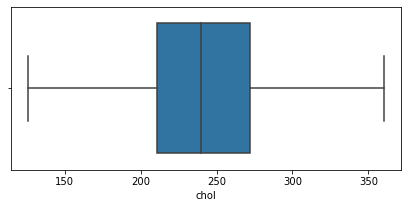

In [213]:
# Verify outlier in chol using box plot method

fig = plt.figure(figsize=(7,3))
sns.boxplot(ht.chol)

C:\Users\Shirish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='oldpeak'>

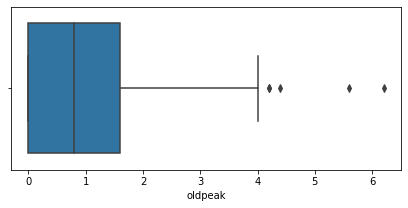

In [214]:
# check outlier in oldpeak using box plot method

fig = plt.figure(figsize=(7,3))
sns.boxplot(ht.oldpeak)

In [215]:
Q1 = ht.oldpeak.quantile(0.25)
Q3 = ht.oldpeak.quantile(0.75)
Q1, Q3

(0.0, 1.6)

In [216]:
IQR = Q3 - Q1
IQR

1.6

In [217]:
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
lower, upper

(-2.4000000000000004, 4.0)

In [218]:
# check outliers out of the limit
ht[(ht.oldpeak<lower) | (ht.oldpeak>upper)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
101,59,1,3,131.623762,270.0,0,0,145,0,4.2,0,0,3,1
204,62,0,0,160.000000,164.0,0,0,145,0,6.2,0,3,3,0
221,55,1,0,140.000000,217.0,0,1,111,1,5.6,0,0,3,0
250,51,1,0,140.000000,298.0,0,1,122,1,4.2,1,3,3,0
291,58,1,0,114.000000,318.0,0,2,140,0,4.4,0,3,1,0


In [219]:
mean=np.mean(ht["oldpeak"])
mean

1.0396039603960396

In [220]:
# Replace all ourliers using mean of variable
ht["oldpeak"] = np.where(ht["oldpeak"] > upper , mean,ht['oldpeak'])
ht["oldpeak"] = np.where(ht["oldpeak"] < lower , mean,ht['oldpeak'])

C:\Users\Shirish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='oldpeak'>

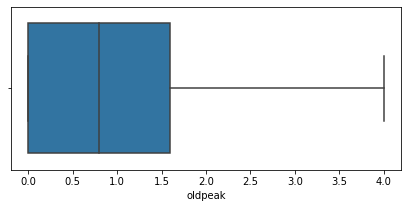

In [221]:
# Verify outlier in oldpeak using box plot method

fig = plt.figure(figsize=(7,3))
sns.boxplot(ht.oldpeak)

In [135]:
# According to medical domain there is a rule for max heart rate

ht['two'] = 220 - ht['age']
ht['two'].head()

0    157
1    183
2    179
3    164
4    163
Name: two, dtype: int64

In [136]:
# checkout max heart - rule wise heart rate
# thalach is maximum rate of patient

ht['diff'] = ht['thalach'] - ht['two']
ht['diff'].head(20)

0     -7
1      4
2     -7
3     14
4      0
5    -15
6    -11
7     -3
8     -6
9     11
10    -6
11   -33
12     0
13   -12
14     0
15   -12
16    10
17   -40
18    -6
19     0
Name: diff, dtype: int64

In [138]:
max(ht['diff'])

29

In [ ]:
# There is only one patient having max heart rate according to scientific rule

In [139]:
# Now drop unwanted columns
# Drop unwanted columns
ht = ht.drop("diff",axis=1)
ht = ht.drop('two',axis=1)
ht.head(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120.0,354.0,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140.0,192.0,0,1,148,0,0.4,1,0,1,1


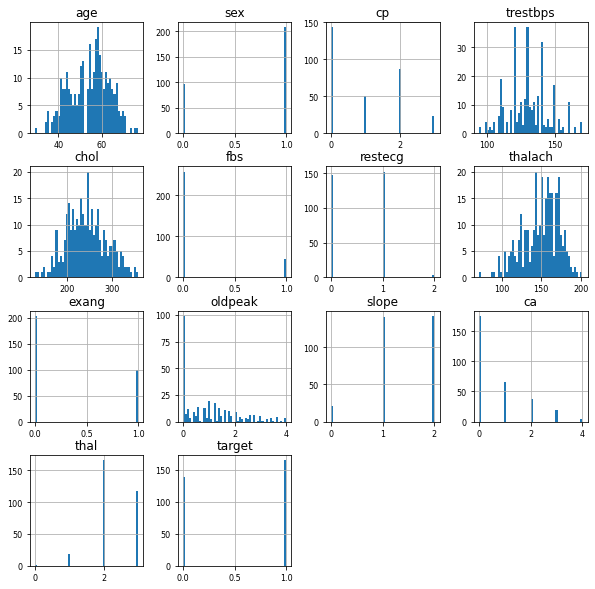

In [222]:
# check the distribution in features

ht.hist(figsize=(10, 10), bins=50, xlabelsize=8, ylabelsize=8);

Features are alomost normally distributed

In [140]:
ht.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [225]:
# Make copy of data set
ht_k = ht.copy()
ht_k

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120.0,354.0,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140.0,241.0,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110.0,264.0,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144.0,193.0,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130.0,131.0,0,1,115,1,1.2,1,1,3,0


In [226]:
# Convert datatype into category which have less unique count
ht.age = ht.age.astype('category')
ht.sex = ht.sex.astype('category')
ht.cp = ht.cp.astype('category')
ht.fbs = ht.fbs.astype('category')
ht.restecg = ht.restecg.astype('category')
ht.exang = ht.exang.astype('category')
ht.slope = ht.slope.astype('category')
ht.ca = ht.ca.astype('category')
ht.thal = ht.thal.astype('category')
ht.target = ht.target.astype('category')

In [227]:
# Verify datatype
ht.dtypes

age         category
sex         category
cp          category
trestbps     float64
chol         float64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
target      category
dtype: object

In [228]:
ht.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120.0,354.0,0,1,163,1,0.6,2,0,2,1


In [229]:
ht.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.0,303.0,303.0,303.000000,303.000000,303.0,303.0,303.000000,303.0,303.000000,303.0,303.0,303.0,303.0
unique,41.0,2.0,4.0,NaN,NaN,2.0,3.0,NaN,2.0,NaN,3.0,5.0,4.0,2.0
top,58.0,1.0,0.0,NaN,NaN,0.0,1.0,NaN,0.0,NaN,2.0,0.0,2.0,1.0
freq,19.0,207.0,143.0,NaN,NaN,258.0,152.0,NaN,204.0,NaN,142.0,175.0,166.0,165.0
mean,NaN,NaN,NaN,130.140640,243.096766,NaN,NaN,149.646865,NaN,0.975571,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,15.132498,44.721709,NaN,NaN,22.905161,NaN,1.040865,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,94.000000,126.000000,NaN,NaN,71.000000,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,120.000000,211.000000,NaN,NaN,133.500000,NaN,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,130.000000,240.000000,NaN,NaN,153.000000,NaN,0.800000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,140.000000,272.000000,NaN,NaN,166.000000,NaN,1.600000,NaN,NaN,NaN,NaN


In [230]:
# split the data into train and test
from sklearn.model_selection import train_test_split

trainx,testx,trainy,testy = train_test_split(
    ht.drop('target',axis=1),
    ht['target'],
    test_size=0.3)

print('trainx={}, trainy={}, testx={}, test={}'.format(trainx.shape,trainy.shape,testx.shape,testy.shape))

trainx=(212, 13), trainy=(212,), testx=(91, 13), test=(91,)


# Logistic Model

In [231]:
from sklearn.linear_model import LogisticRegression
m_log = LogisticRegression()

In [232]:
m_log.fit(trainx, trainy)

C:\Users\Shirish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [233]:
# Prediction
p_log = m_log.predict(testx)
p_log

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1], dtype=int64)

In [234]:
#nConfusion Metrics
from sklearn.metrics import confusion_matrix
tab = confusion_matrix(testy,p_log)
tab

array([[26, 13],
       [ 2, 50]], dtype=int64)

In [235]:
acc = tab.diagonal().sum()/tab.sum()* 100
acc

83.51648351648352

In [236]:
# classification_report
from sklearn.metrics import classification_report
print(classification_report(testy,p_log))

              precision    recall  f1-score   support

           0       0.93      0.67      0.78        39
           1       0.79      0.96      0.87        52

    accuracy                           0.84        91
   macro avg       0.86      0.81      0.82        91
weighted avg       0.85      0.84      0.83        91



In [237]:
# Lets AUC/ROC curve plot

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [238]:
log_roc_auc = roc_auc_score(testy, p_log)
log_roc_auc     
# Area under Roc cureve value
# its good model with 87% 

0.8141025641025642

In [239]:
# Prediction Probability
p_prob = m_log.predict_proba(testx)
p_prob

array([[0.13301804, 0.86698196],
       [0.09055101, 0.90944899],
       [0.19775   , 0.80225   ],
       [0.16010763, 0.83989237],
       [0.10248212, 0.89751788],
       [0.67902633, 0.32097367],
       [0.31603601, 0.68396399],
       [0.18010663, 0.81989337],
       [0.09395745, 0.90604255],
       [0.43513637, 0.56486363],
       [0.36356006, 0.63643994],
       [0.26321836, 0.73678164],
       [0.02708099, 0.97291901],
       [0.05895784, 0.94104216],
       [0.10808231, 0.89191769],
       [0.1188863 , 0.8811137 ],
       [0.02003822, 0.97996178],
       [0.98557973, 0.01442027],
       [0.38779442, 0.61220558],
       [0.2685036 , 0.7314964 ],
       [0.05219084, 0.94780916],
       [0.63134471, 0.36865529],
       [0.31911437, 0.68088563],
       [0.99639613, 0.00360387],
       [0.26990823, 0.73009177],
       [0.93542126, 0.06457874],
       [0.47021906, 0.52978094],
       [0.24567093, 0.75432907],
       [0.13797214, 0.86202786],
       [0.33455628, 0.66544372],
       [0.

In [240]:
pred_prob_df = pd.DataFrame(p_prob)
pred_prob_df.head(10)

,0,1
0,0.133018,0.866982
1,0.090551,0.909449
2,0.197750,0.802250
3,0.160108,0.839892
4,0.102482,0.897518
5,0.679026,0.320974
6,0.316036,0.683964
7,0.180107,0.819893
8,0.093957,0.906043
9,0.435136,0.564864


In [241]:
fpr , tpr , threshold = roc_curve(testy, pred_prob_df.iloc[:,1])

In [242]:
fpr

array([0.        , 0.        , 0.        , 0.02564103, 0.02564103,
       0.05128205, 0.05128205, 0.1025641 , 0.1025641 , 0.12820513,
       0.12820513, 0.17948718, 0.17948718, 0.20512821, 0.20512821,
       0.25641026, 0.25641026, 0.28205128, 0.28205128, 0.30769231,
       0.30769231, 0.33333333, 0.33333333, 0.48717949, 0.48717949,
       0.61538462, 0.61538462, 1.        ])

In [243]:
tpr

array([0.        , 0.01923077, 0.11538462, 0.11538462, 0.26923077,
       0.26923077, 0.51923077, 0.51923077, 0.63461538, 0.63461538,
       0.67307692, 0.67307692, 0.71153846, 0.71153846, 0.75      ,
       0.75      , 0.76923077, 0.76923077, 0.78846154, 0.78846154,
       0.90384615, 0.90384615, 0.96153846, 0.96153846, 0.98076923,
       0.98076923, 1.        , 1.        ])

In [244]:
threshold

array([1.99099496, 0.99099496, 0.97253955, 0.95478288, 0.92706384,
       0.9190108 , 0.87108198, 0.8659345 , 0.77701079, 0.75893023,
       0.75268444, 0.73678164, 0.7314964 , 0.73009177, 0.68396399,
       0.67918912, 0.67621142, 0.66544372, 0.66214348, 0.6460758 ,
       0.56486363, 0.55882384, 0.52978094, 0.32097367, 0.28095121,
       0.06631375, 0.06457874, 0.00261315])

In [245]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'AURO CURVE')

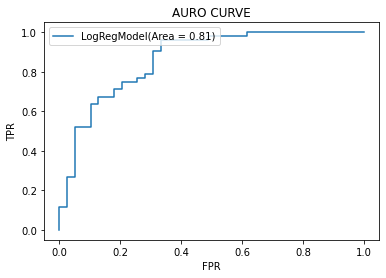

In [246]:
plt.plot(fpr, tpr, label  = "LogRegModel(Area = %.2f)" % log_roc_auc)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc = "upper left")
plt.title("AURO CURVE")

Here we get better results with 81.1% accuracy

# Cross Validation

In [248]:
# Split data into train and test
# split the data into train and test
from sklearn.model_selection import train_test_split

trainx,testx,trainy,testy = train_test_split(
    ht_k.drop('target',axis=1),
    ht_k['target'],
    test_size=0.3)

print('trainx={}, trainy={}, testx={}, test={}'.format(trainx.shape,trainy.shape,testx.shape,testy.shape))

trainx=(212, 13), trainy=(212,), testx=(91, 13), test=(91,)


In [249]:
# K-Fold Cross Validation
from sklearn.metrics import accuracy_score
import statsmodels.api as sm 
from sklearn.model_selection import KFold
folds = 5
cv_acc = []

X = trainx.values
Y = trainy.values

kf = KFold(folds)
# kf.get_n_splits(X)

# kf.get_n_splits(X)

for train_index,test_index in kf.split(X):
    cv_trainx,cv_trainy = X[train_index], Y[train_index]
    cv_testx, cv_testy = X[test_index],Y[test_index]

    # build model on cv_train and predict on cv_test
    m = sm.Logit(cv_trainy,cv_trainx).fit()
    p = m.predict(cv_testx)
    
    # convert prediction into clases
    p_Y = p.copy()
    
    # take the cuttpf as 0.5
    p_Y[p_Y < 0.5] = 0
    p_Y[p_Y > 0.5] = 1
        
    
    # calculate the accuracy 
    cv_acc.append(np.round(accuracy_score(cv_testy,p_Y),3))
    
# print the CV accuracies
print(cv_acc)

# train accuracy
np.round(np.mean(cv_acc),2)    

Optimization terminated successfully.
         Current function value: 0.364390
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.321263
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.336362
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.368830
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.336680
         Iterations 7
[0.814, 0.791, 0.833, 0.857, 0.762]


0.81

After cross validation we get here 81% of accuracy